<a href="https://colab.research.google.com/github/pasumarthi/EIP4/blob/master/Session1/EIP4_assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


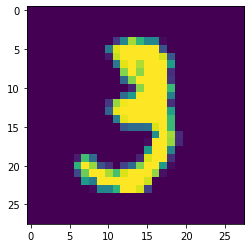

In [29]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[10])

In [30]:
print(X_train.shape[0])

60000


In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [33]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [35]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation,Dense
model = Sequential()

 
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))#26
model.add(Conv2D(64, (3, 3), activation='relu'))       # 24   
model.add(Conv2D(8,(1,1),activation='relu'))     #24

model.add(MaxPooling2D(pool_size=(2, 2)))  #12
model.add(Dropout(0.05))
          
model.add(Conv2D(32, (3, 3), activation='relu'))     #10                    
model.add(Conv2D(64, (3, 3), activation='relu'))      # 8  
model.add(Conv2D(8,(1,1),activation='relu'))   #8

model.add(MaxPooling2D(pool_size=(2,2)))            #4     
model.add(Dropout(0.05))

model.add(Conv2D(32, (3,3),activation='relu'))#2
#model.add(Conv2D(10,(1,1),activation='relu'))
#model.add(GlobalAveragePooling2D())
model.add(Flatten())
#model.add(Dense(100))
model.add(Dense(10))



model.add(Activation('softmax'))

In [105]:
 
'''from keras.layers import Activation,Dense,Convolution2D
model = Sequential()
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(64, 3, 3, activation='relu'))
model.add(Convolution2D(16, 1, 1, activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.15))
          

model.add(Convolution2D(32,3,3, activation='relu'))
model.add(Convolution2D(16, 1, 1, activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.5))

model.add(Convolution2D(32,3,3, activation='relu'))
model.add(Convolution2D(10,3,3))
model.add(Flatten())
model.add(Activation('softmax'))'''

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (1, 1), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (1, 1), activation="relu")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: 

In [124]:
model.summary()

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_152 (Conv2D)          (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_153 (Conv2D)          (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_154 (Conv2D)          (None, 24, 24, 8)         520       
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 12, 12, 8)         0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 12, 12, 8)         0         
_________________________________________________________________
conv2d_155 (Conv2D)          (None, 10, 10, 32)        2336      
_________________________________________________________________
conv2d_156 (Conv2D)          (None, 8, 8, 64)        

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [126]:
model.fit(X_train, Y_train, batch_size=32, epochs=25, verbose=1,validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/25
54000/54000 [==============================] - 27s 493us/step - loss: 0.2250 - acc: 0.9275 - val_loss: 0.0602 - val_acc: 0.9817
Epoch 2/25
54000/54000 [==============================] - 25s 455us/step - loss: 0.0782 - acc: 0.9758 - val_loss: 0.0555 - val_acc: 0.9833
Epoch 3/25
54000/54000 [==============================] - 25s 456us/step - loss: 0.0602 - acc: 0.9817 - val_loss: 0.0504 - val_acc: 0.9848
Epoch 4/25
54000/54000 [==============================] - 25s 458us/step - loss: 0.0498 - acc: 0.9851 - val_loss: 0.0319 - val_acc: 0.9897
Epoch 5/25
54000/54000 [==============================] - 24s 451us/step - loss: 0.0433 - acc: 0.9864 - val_loss: 0.0341 - val_acc: 0.9898
Epoch 6/25
54000/54000 [==============================] - 24s 454us/step - loss: 0.0388 - acc: 0.9873 - val_loss: 0.0348 - val_acc: 0.9893
Epoch 7/25
54000/54000 [==============================] - 24s 452us/step - loss: 0.0353 - acc: 0.9887 - val_loss: 0.0

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [128]:
print(score)

[0.030456522768935974, 0.9923]


In [0]:
y_pred = model.predict(X_test)

In [130]:
print(y_pred[:9])
print(y_test[:9])

[[9.2398914e-14 1.8458331e-10 1.7041974e-11 1.7931791e-07 6.4217823e-14
  2.6849645e-10 3.2723510e-22 9.9999976e-01 7.6214744e-14 5.9771836e-09]
 [1.4178154e-15 3.1661097e-12 1.0000000e+00 6.3730912e-16 2.8798734e-16
  4.3477699e-20 6.2288770e-13 2.6728601e-14 4.6651590e-17 1.1470112e-18]
 [3.3539737e-11 9.9999964e-01 4.1203503e-09 8.4878103e-12 5.0092823e-09
  7.7478852e-08 3.5130031e-11 7.8088604e-08 2.2594395e-07 5.7308056e-09]
 [9.9999392e-01 1.8410349e-12 8.3821243e-09 8.8092776e-08 7.4964835e-12
  7.5110407e-08 4.1631015e-06 6.4048405e-10 9.9240003e-07 6.7365687e-07]
 [4.2038345e-13 2.2219582e-14 8.1549862e-12 4.0887954e-14 9.9999905e-01
  7.9924619e-13 1.1404616e-10 3.9360805e-14 3.2120653e-09 9.7763450e-07]
 [1.6298066e-13 9.9999976e-01 4.3004604e-09 5.7253512e-14 2.3650129e-09
  7.1586215e-10 1.3460440e-12 1.3479745e-07 1.2406912e-07 6.9990103e-10]
 [9.0464044e-22 1.1797939e-11 4.6851112e-10 5.9412822e-14 9.9999738e-01
  2.2168019e-11 4.4425860e-19 1.3628868e-07 8.0395870e-07 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

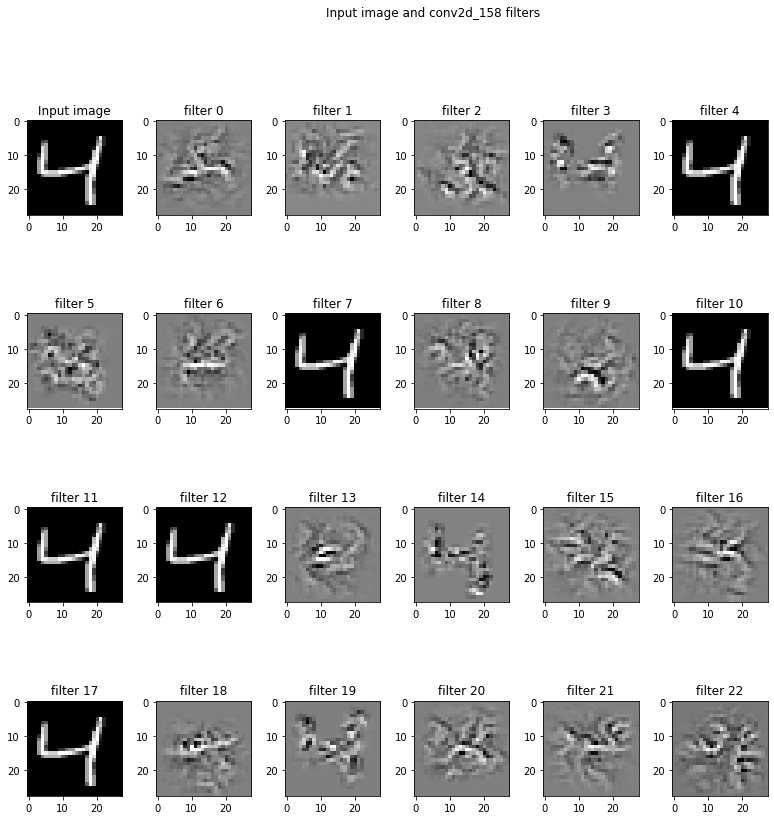

In [133]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_158'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()